In [117]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA PREPROCESSING


In [118]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [119]:
# drop cabin
df.drop('Cabin' ,axis=1 ,  inplace = True)

In [120]:
# replacing age by mean age
mean_age = df['Age'].mean()
print(mean_age)

29.69911764705882


In [121]:
df['Age'].fillna(mean_age , inplace = True)


In [122]:
df.shape

(891, 11)

In [123]:
# replacing embarked by its mode value
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)

In [124]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [125]:
# droping the name column
df.drop('Name' , axis =1 , inplace = True)


In [126]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


Data Visualisation

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

checking survival rate vs (sex , age , pclass)

### 0 --> Negative
### 1 --> Positive

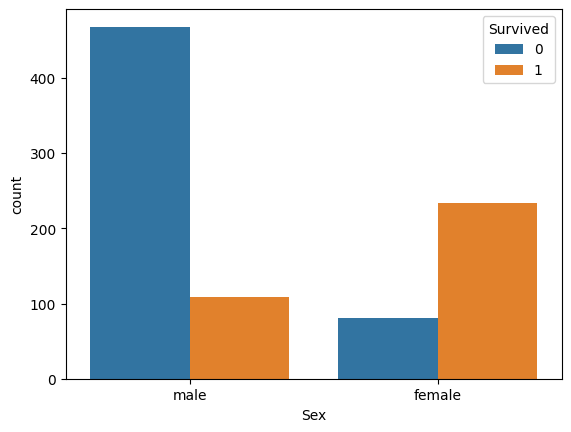

In [128]:
sns.countplot(data = df , x = 'Sex' , hue = 'Survived' )
plt.show()

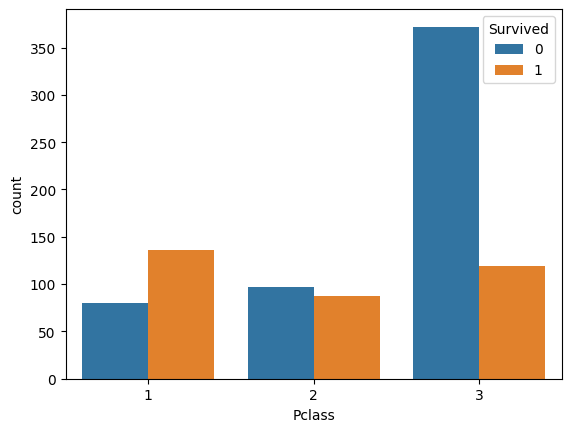

In [129]:
sns.countplot(data = df , x = 'Pclass' , hue = 'Survived' )
plt.show()

In [130]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


male --> 0

female --> 1

In [131]:
df.replace(
    {"Sex": {"male" : 0 , "female": 1} },inplace = True
)


In [132]:
df.drop(['Ticket', 'Embarked'] , axis = 1 , inplace = True)

In [133]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [134]:
x = df.drop('Survived' , axis = 1)
y = df['Survived']
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500


In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , stratify=y , random_state = 2)

In [136]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_train = LogisticRegression()
lr_train.fit(x_train , y_train)
lr_train_pred = lr_train.predict(x_train)
score_train = accuracy_score(lr_train_pred , y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
print(score_train)

0.800561797752809


In [139]:

lr_test = LogisticRegression()
lr_test.fit(x_test , y_test)
lr_test_pred = lr_test.predict(x_test)
score_test = accuracy_score(lr_test_pred , y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
print(score_test)

0.7988826815642458
